# Import

In [1]:
import ast
import numpy as np
import matplotlib.pyplot as plt

from sqlalchemy import create_engine
from sqlalchemy.orm import sessionmaker
from models.comment import Comment
from models.gitFile import GitFile
from models.issue import Issue
from models.modifiedFiles import ModifiedFiles
from models.pullRequest import PullRequest
from models.repository import Repository
from models.testResult import TestResult

# Queries

In [2]:
engine = create_engine('sqlite:///sqliteDatabase.db')
Session = sessionmaker(bind=engine)
session = Session()

test_results = session.query(TestResult).all()
modified_files = session.query(ModifiedFiles).all()

# Result transformation

In [3]:
result_list = []

for result in test_results:
    result_list.append(ast.literal_eval(result.results_array))

files_by_pr = [[] for _ in range(max(modified_files, key=lambda f: f.pullRequestId).pullRequestId)]

for file in modified_files:
    files_by_pr[file.pullRequestId-1].append(file.gitFileId)

### examples

In [4]:
for result in result_list:
    print(result)

for file in files_by_pr:
    print(file)

[['pilot/utils/test_arguments.py', 0.23226526379585266], [212, 0.2313588559627533], [231, 0.23119968175888062], ['pilot/database/connection/postgres.py', 0.23118725419044495], [224, 0.2279188185930252], [224, 0.22667081654071808], [227, 0.2176695466041565], ['pilot/utils/test_files.py', 0.2130013406276703], [215, 0.2113901972770691], [212, 0.20623919367790222], ['pilot/utils/files.py', 0.20553900301456451], [215, 0.20452363789081573], [230, 0.20257031917572021], [215, 0.19732071459293365], [224, 0.19520676136016846], [237, 0.19064630568027496], [224, 0.18665973842144012], [224, 0.18480390310287476], ['pilot/utils/files.py', 0.18190385401248932], [224, 0.18012011051177979], [227, 0.17854759097099304], [231, 0.1758948713541031], [217, 0.17073480784893036], [222, 0.16392533481121063], ['pilot/utils/test_arguments.py', 0.1635899841785431], [212, 0.15989673137664795], [237, 0.15854766964912415], [224, 0.15726833045482635], ['pilot/utils/exit.py', 0.15595172345638275], [231, 0.14924058318138

# Stats

### Function to find the index of the first match between the result array and it's corresponding modified files

In [5]:
def find_first_match(arr1, arr2):
    for val1, i in arr1:
        if val1 in arr2:
            return arr1.index([val1, i])
    return -1

In [6]:
index_list = []

for result, files in zip(result_list, files_by_pr):
    index_list.append(find_first_match(result, files))

print(index_list)

[-1, 0, 3, 3, 0, 56]


### Function to get the average and median of a list as well as all the count of all repetitive numbers

In [7]:
def average_skip_negatives(arr):
    skipped = 0
    filtered_arr = [x for x in arr if x != -1]
    
    if len(filtered_arr) > 0:
        avg = np.mean(filtered_arr)
        median = np.median(filtered_arr)
    else:
        avg = 0
        median = 0
    
    for x in arr:
        if x == -1:
            skipped += 1
    
    print(f"Code T5 didn't find {skipped} results")
    
    # Count occurrences of each number
    num_counts = {}
    for x in filtered_arr:
        if x in num_counts:
            num_counts[x] += 1
        else:
            num_counts[x] = 1
    
    # Print number counts
    for num, count in num_counts.items():
        print(f"Code T5 found {count} answers in the position {num + 1}")
    
    return avg, median

In [8]:
avg, med = average_skip_negatives(index_list)

print("average : ", avg)
print("median : ", med)

Code T5 didn't find 1 results
Code T5 found 2 answers in the position 1
Code T5 found 2 answers in the position 4
Code T5 found 1 answers in the position 57
average :  12.4
median :  3.0


### Graphical representation of the results

In [9]:
index_list = [x for x in index_list if x != -1]

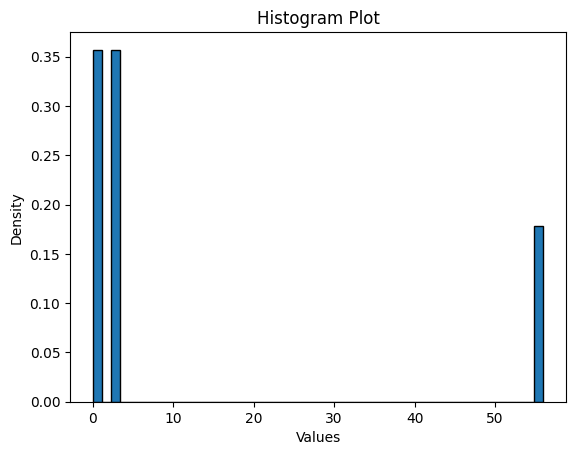

In [10]:
# Histogram plot
plt.hist(index_list, bins=50, edgecolor='black', density=True)
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Histogram Plot')
plt.show()

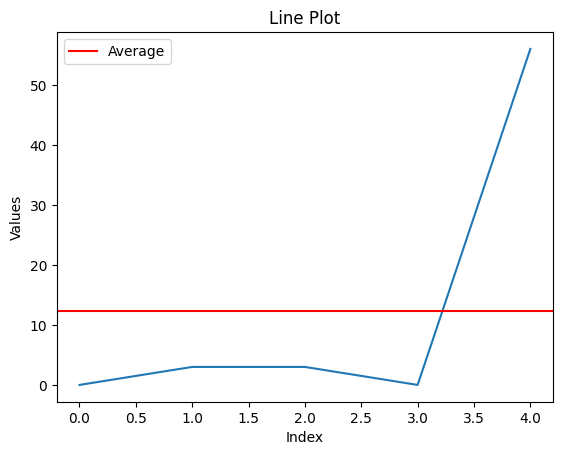

In [11]:
# Line plot
plt.plot(index_list)
plt.axhline(y=avg, color='r', linestyle='-', label='Average')
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Line Plot')
plt.legend()
plt.show()

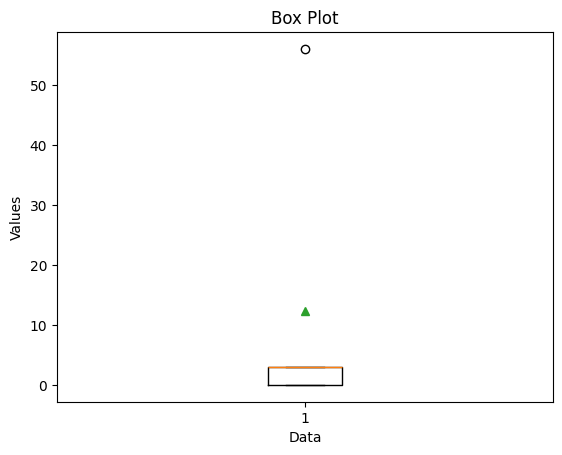

In [12]:
# Box plot
plt.boxplot(index_list, showmeans=True)
plt.xlabel('Data')
plt.ylabel('Values')
plt.title('Box Plot')
plt.show()